In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

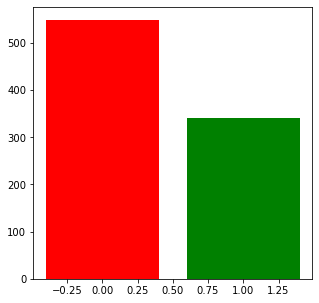

In [17]:
plt.figure(figsize=(5,5))
plt.bar(list(train["Survived"].value_counts().keys()),list(train["Survived"].value_counts()),color=['r','g'])
plt.show()

<AxesSubplot:ylabel='Survived'>

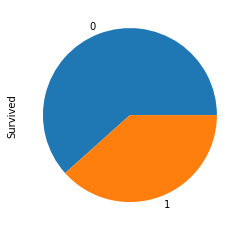

In [12]:
train["Survived"].value_counts().plot(kind = "pie")

In [18]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

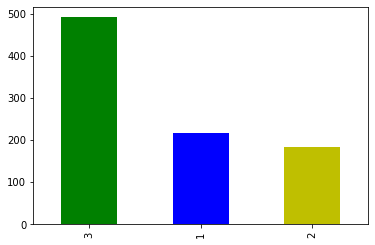

In [24]:
train["Pclass"].value_counts().plot(kind = "bar",color=['g','b','y'])

<AxesSubplot:>

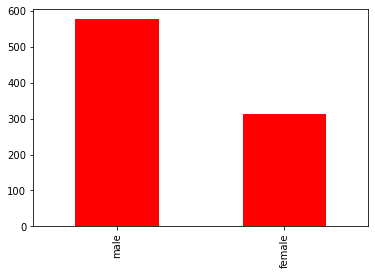

In [15]:
train["Sex"].value_counts().plot(kind = "bar",color='r')

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

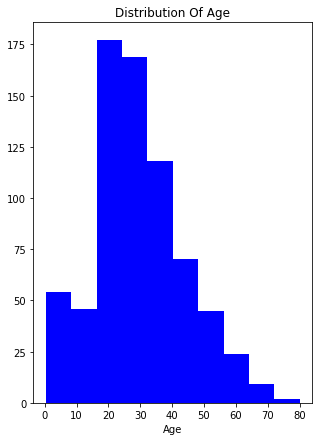

In [28]:
plt.figure(figsize=(5,7))
plt.hist(train["Age"],color='b')
plt.title("Distribution Of Age")
plt.xlabel("Age")
plt.show()

In [29]:
sum(train['Survived'].isnull())

0

In [46]:
Survival_based_on_gender=pd.crosstab(train["Survived"],train['Sex'])

In [38]:
Survival_based_on_gender

Sex,female,male
Survived,,
0,81,468
1,233,109


In [39]:
Survival_based_on_class = pd.crosstab(train["Survived"],train['Pclass'])

In [40]:
Survival_based_on_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [52]:
train.corr().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

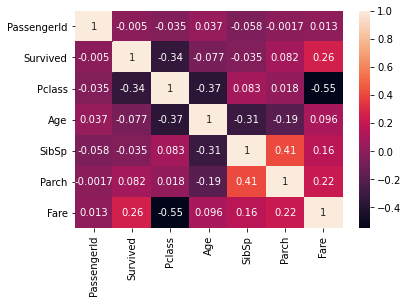

In [53]:
sbn.heatmap(train.corr(),annot=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass'>

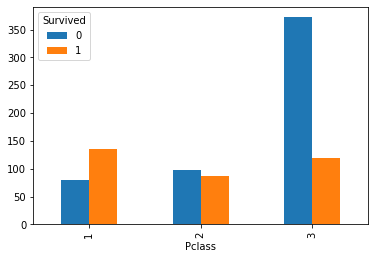

In [55]:
pd.crosstab(train["Pclass"],train['Survived']).plot(kind = "bar") 

<AxesSubplot:xlabel='Embarked'>

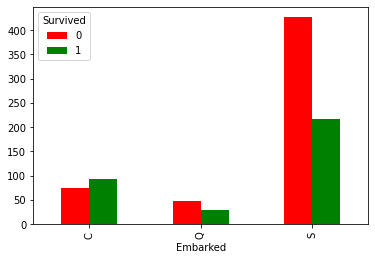

In [57]:

pd.crosstab(train["Embarked"],train['Survived']).plot(kind = 'bar',color=['r','g'])

<AxesSubplot:xlabel='Sex'>

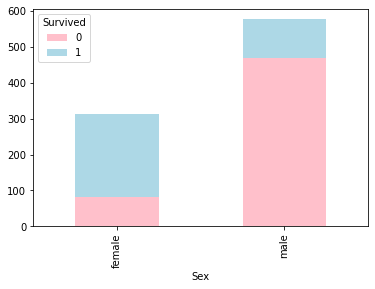

In [63]:
pd.crosstab(train["Sex"],train['Survived']).plot(kind = 'bar',color=['pink','lightblue'] ,stacked=True) 


<AxesSubplot:xlabel='Parch'>

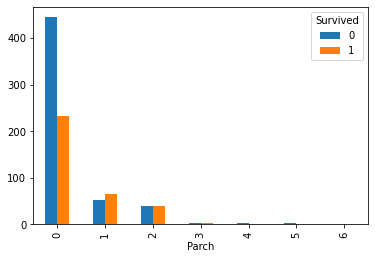

In [65]:
pd.crosstab(train["Parch"],train['Survived']).plot(kind = 'bar') 

<AxesSubplot:xlabel='SibSp'>

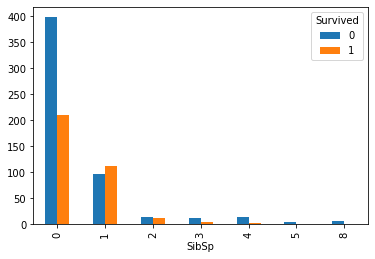

In [66]:
pd.crosstab(train["SibSp"],train['Survived']).plot(kind = 'bar') 

<AxesSubplot:xlabel='Age'>

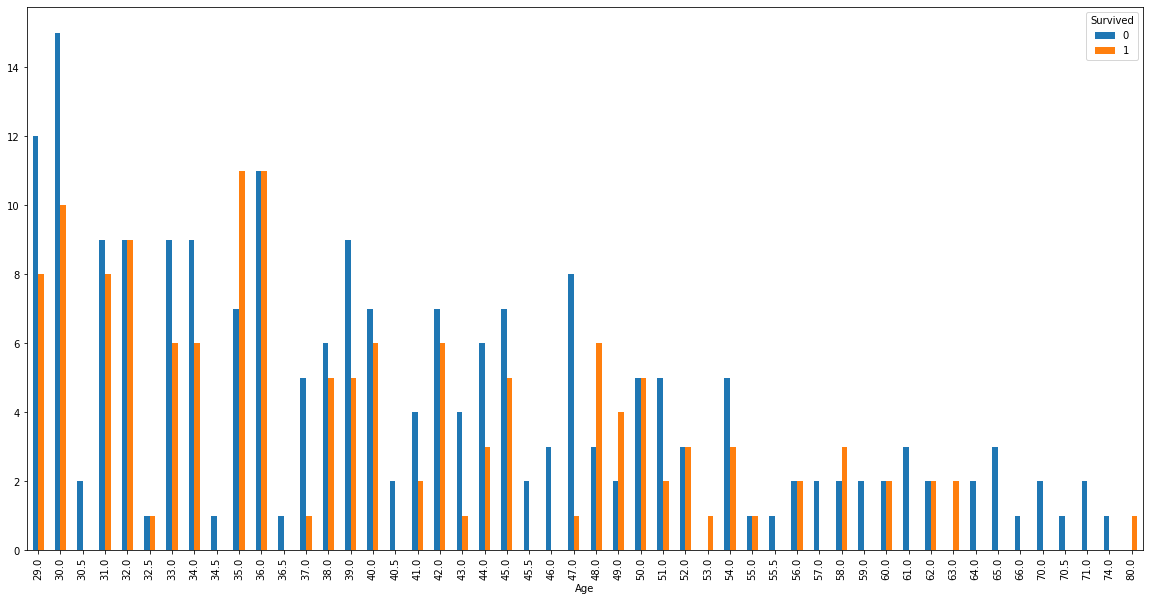

In [70]:
pd.crosstab(train["Age"],train['Survived']).tail(50).plot(kind = 'bar',  figsize=(20, 10))

<AxesSubplot:xlabel='Age'>

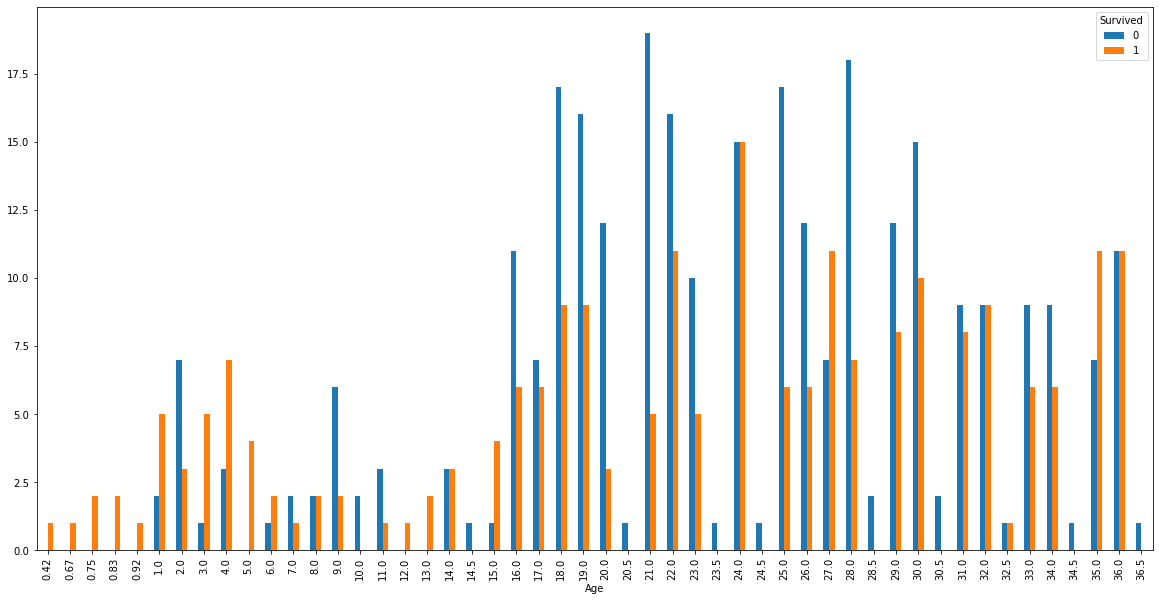

In [71]:
pd.crosstab(train["Age"],train['Survived']).head(50).plot(kind = 'bar',  figsize=(20, 10))

In [72]:
train.pivot_table(values="Fare", index = "Age", columns = "Pclass").head(50)

Pclass,1,2,3
Age,,,
0.42,NaN,NaN,8.516700
0.67,NaN,14.500000,NaN
0.75,NaN,NaN,19.258300
0.83,NaN,23.875000,NaN
0.92,151.550000,NaN,NaN
1.00,NaN,38.002100,26.807500
2.00,151.550000,26.000000,24.544643
3.00,NaN,28.776400,22.787500
4.00,81.858300,31.000000,21.653571


In [73]:
from scipy.stats import mode

In [74]:
train.pivot_table(values="Survived", index = "Sex", columns = "Pclass",aggfunc=(lambda x: mode(x)[0]))

Pclass,1,2,3
Sex,,,
female,1,1,0
male,0,0,0


In [75]:
train.pivot_table(values="Survived", index = "Sex", columns = "SibSp",aggfunc=(lambda x: mode(x)[0]))

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,1,1,1,0,0,0,0
male,0,0,0,0,0,0,0


In [76]:
train["Sex"].replace({"female":1, "male":0}, inplace=True)

<AxesSubplot:>

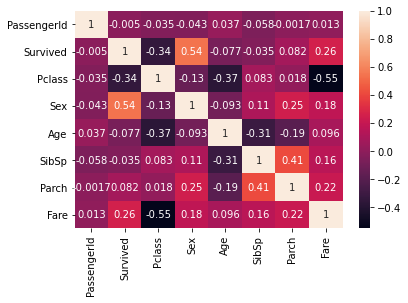

In [79]:
sbn.heatmap(train.corr(),annot=True)

In [80]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
train[train['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [83]:
train['Embarked'].fillna('C', inplace=True)

In [84]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [85]:
train['Cabin'].fillna('unknown', inplace=True)

In [86]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [88]:
male_mean, female_mean = train.groupby(['Sex'])['Age'].mean()

In [89]:
male_mean

30.72664459161148

In [90]:
female_mean

27.915708812260537

In [93]:
import math

In [94]:
def age_func(age, sex):
    if math.isnan(age):
        if sex == 0:
            return male_mean
        else:
            return female_mean
    else:
        return float(age)

In [97]:
train['Age'] = train.apply(lambda x : age_func(x["Age"],x["Sex"]),axis = 1)

In [98]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

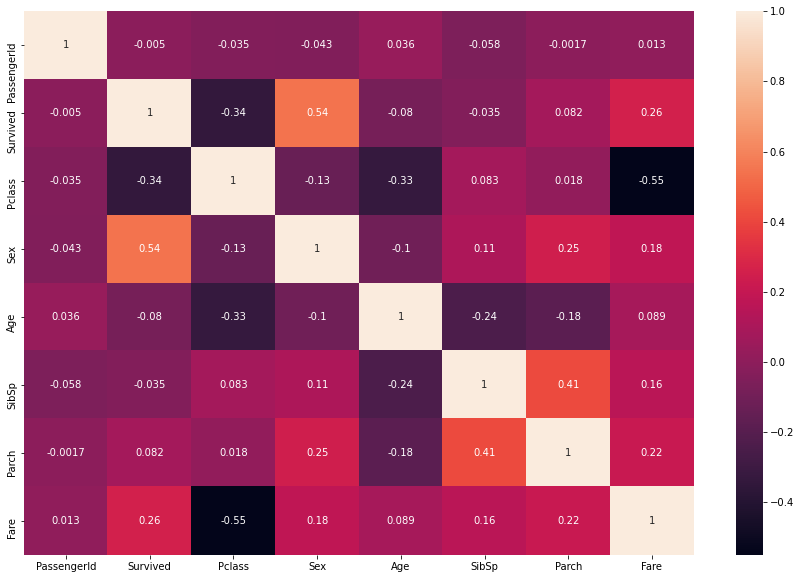

In [102]:
plt.figure(figsize=(15,10))
sbn.heatmap(train.corr(), annot=True)

In [109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [111]:
test['Cabin'].fillna('unknown', inplace=True)

In [112]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [113]:
test_male_mean, test_female_mean = test.groupby(['Sex'])['Age'].mean()

In [114]:
test_male_mean

30.27236220472441

In [115]:
test_female_mean

30.27273170731707

In [116]:
test['Age'] = test.apply(lambda x : age_func(x["Age"],x["Sex"]),axis = 1)

In [117]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [118]:
test['Fare'].mean()

35.6271884892086

In [119]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [124]:
test["Sex"].replace({"female":1, "male":0}, inplace=True)

In [120]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,unknown,S


In [125]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",0,27.915709,0,0,A.5. 3236,8.0500,unknown,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S
416,1308,3,"Ware, Mr. Frederick",0,27.915709,0,0,359309,8.0500,unknown,S
417,1309,3,"Peter, Master. Michael J",0,27.915709,1,1,2668,22.3583,unknown,C


In [126]:
data= pd.concat([train, test])

In [127]:
data2 = data.drop(columns=['Cabin', 'Ticket', 'Name'])

In [128]:
data2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.000000,1,0,7.2500,S
1,2,1.0,1,1,38.000000,1,0,71.2833,C
2,3,1.0,3,1,26.000000,0,0,7.9250,S
3,4,1.0,1,1,35.000000,1,0,53.1000,S
4,5,0.0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,27.915709,0,0,8.0500,S
414,1306,NaN,1,1,39.000000,0,0,108.9000,C
415,1307,NaN,3,0,38.500000,0,0,7.2500,S
416,1308,NaN,3,0,27.915709,0,0,8.0500,S


In [130]:
data2.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,S
1,2,1.0,1,1,38.0,1,0,71.2833,C


In [131]:
data2['Embarked'].replace({'C': 3, 'Q': 2,'S': 1}, inplace=True)

In [133]:
numerical_cols = data2.select_dtypes(include = np.number).drop(columns='Survived').columns

In [136]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [134]:
categorical_cols = data2.select_dtypes(exclude= np.number).columns

In [137]:
scaler = StandardScaler()

In [138]:
num_df = pd.DataFrame(scaler.fit_transform(data2[numerical_cols]), columns=numerical_cols)

In [139]:
num_df.shape

(1309, 8)

In [140]:
num_df.reset_index(drop='index', inplace=True)

In [141]:
data2.reset_index(drop='index', inplace=True)

In [142]:
num_df2 = pd.concat([num_df, data2['Survived']], axis=1)

In [143]:
num_df2.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.730728,0.841916,-0.743497,-0.601149,0.481288,-0.445,-0.503629,-0.624618,0.0
1,-1.728082,-1.546098,1.344995,0.639529,0.481288,-0.445,0.734468,1.827031,1.0
2,-1.725435,0.841916,1.344995,-0.290980,-0.479087,-0.445,-0.490578,-0.624618,1.0
3,-1.722789,-1.546098,1.344995,0.406902,0.481288,-0.445,0.382890,-0.624618,1.0
4,-1.720143,0.841916,-0.743497,0.406902,-0.479087,-0.445,-0.488161,-0.624618,0.0
5,-1.717496,0.841916,-0.743497,0.075535,-0.479087,-0.445,-0.480266,0.601206,0.0
6,-1.714850,-1.546098,-0.743497,1.880207,-0.479087,-0.445,0.358963,-0.624618,0.0


In [147]:
df_test = num_df2[num_df2['Survived'].isna()].drop(columns='Survived')

In [148]:
df_train = num_df2.dropna(subset=['Survived'])

In [149]:
logistic = LogisticRegression(max_iter=100)

In [150]:
X_train = df_train.drop(columns=['PassengerId','Survived'])

In [151]:
y_train = df_train['Survived']

In [152]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [153]:
y_train_pred = logistic.predict(X_train)

In [154]:
logistic.coef_

array([[-0.89724504,  1.28687554, -0.50641401, -0.33846858, -0.0831636 ,
         0.10343163,  0.18200426]])

In [155]:
logistic.intercept_

array([-0.60267117])

<AxesSubplot:>

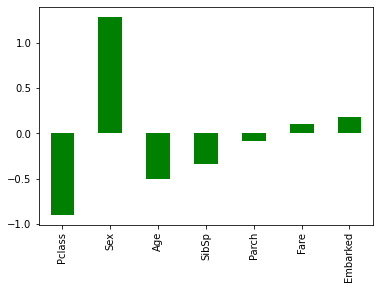

In [157]:
pd.Series(data = logistic.coef_[0],index=X_train.columns).plot(kind='bar',color='g')

In [158]:
accuracy_score(y_train, y_train_pred)

0.8002244668911336

In [159]:
confusion_matrix(y_train, y_train_pred)

array([[473,  76],
       [102, 240]], dtype=int64)

In [160]:
cross_val_score(logistic, X_train, y_train, scoring='accuracy', cv=10)

array([0.78888889, 0.79775281, 0.7752809 , 0.80898876, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84269663])

In [161]:
X_test = df_test.drop(columns='PassengerId')

In [162]:
y_test_pred = logistic.predict(X_test).astype(int)

In [163]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
sample.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [167]:
sample['Survived'] = y_test_pred

In [168]:
sample.to_csv('final_submission.csv', index=False)

In [169]:
from IPython.display import Image

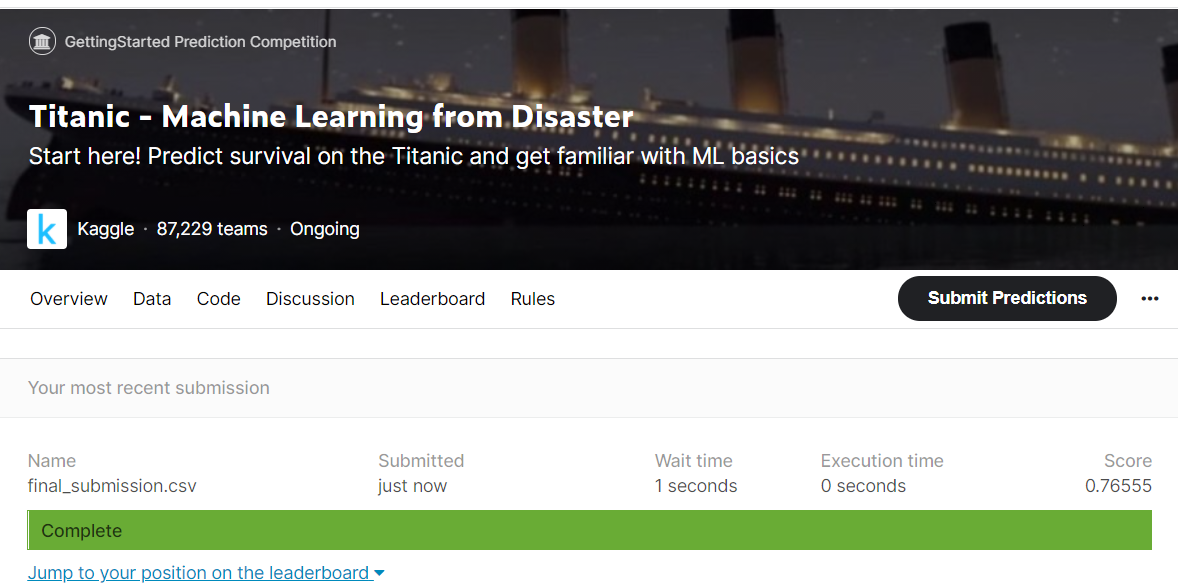

In [171]:
Image(filename='result.png')